# Protein Creation Process

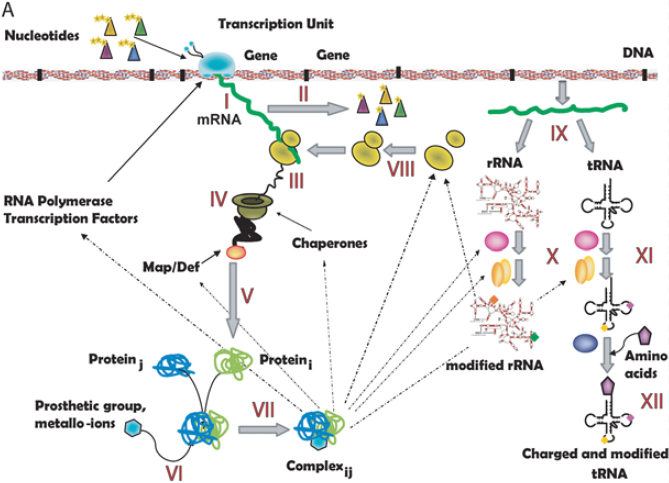

**Content of the ‘E-matrix’.** (A) Schematic representation of the network components and reactions is shown. In addition to the macromolecular synthesis of RNA and proteins, rRNA and tRNA processing reactions were included in the reconstruction. I: Transcription; II: mRNA degradation; III: translation; IV: protein maturation; V: protein folding; VI: metallo-ion binding; VII: protein complex formation; VIII: ribosome assembly; IX: RNA processing; X: rRNA modification; XI: tRNA modification; XII: tRNA charging (see Table 1 for complete list of subsystems and Figure S1 for a complete protein map). 

Image found in "Thiele I, Jamshidi N, Fleming RMT, Palsson BØ (2009) Genome-Scale Reconstruction of Escherichia coli’s Transcriptional and Translational Machinery: A Knowledge Base, Its Mathematical Formulation, and Its Functional Characterization. PLoS Comput Biol 5(3): e1000312. doi:10.1371/journal.pcbi.1000312"

In [182]:
from __future__ import print_function, division, absolute_import

# python imports
import re
from os.path import join
from collections import defaultdict
import pickle
import pandas as pd

# third party imports
import pandas
import tabulate
import cobra

# ECOLIme
import ecolime
from ecolime import (transcription, translation, flat_files, generics, formulas, compartments)

# COBRAme
import cobrame
from cobrame.util import building, mu, me_model_interface
#from cobrame.io.json import save_json_me_model, save_reduced_json_me_model

In [2]:
import pickle
import cobrame
#from cobrame.io.json import load_reduced_json_me_model, load_json_me_model

In [3]:
with open('./me_models/iJL1678b.pickle', 'rb') as f:
    me = pickle.load(f)

In [4]:
me.reactions.query('ACALD')

[<MEReaction DM_AACALD at 0x27facde4d30>,
 <MetabolicReaction ACALD_REV_ADHE-CPLX_mod_fe2 at 0x27fd6840eb0>,
 <MetabolicReaction ACALD_FWD_ADHE-CPLX_mod_fe2 at 0x27fd68540a0>,
 <MetabolicReaction ACALD_REV_MHPF-MONOMER at 0x27fd6854040>,
 <MetabolicReaction ACALD_FWD_MHPF-MONOMER at 0x27fd68541f0>,
 <MetabolicReaction ACALDtex_REV_CPLX0-7530 at 0x27fd6854250>,
 <MetabolicReaction ACALDtex_FWD_CPLX0-7530 at 0x27fd68542b0>,
 <MetabolicReaction ACALDtex_REV_G6700-MONOMER at 0x27fd68543d0>,
 <MetabolicReaction ACALDtex_FWD_G6700-MONOMER at 0x27fd6854400>,
 <MetabolicReaction ACALDtex_REV_CPLX0-7534 at 0x27fd6854430>,
 <MetabolicReaction ACALDtex_FWD_CPLX0-7534 at 0x27fd6854460>,
 <MetabolicReaction ACALDtex_REV_CPLX0-7533 at 0x27fd6854490>,
 <MetabolicReaction ACALDtex_FWD_CPLX0-7533 at 0x27fd68544c0>,
 <MetabolicReaction ACALDtpp_REV_SPONT at 0x27fd68544f0>,
 <MetabolicReaction ACALDtpp_FWD_SPONT at 0x27fd6854550>,
 <MetabolicReaction PACALDt2rpp_REV_CPLX_dummy at 0x27fd72a4460>,
 <Metabo

In [52]:
dir(me.reactions)

['12DGR120tipp_FWD_CPLX_dummy',
 '12DGR140tipp_FWD_CPLX_dummy',
 '12DGR141tipp_FWD_CPLX_dummy',
 '12DGR160tipp_FWD_CPLX_dummy',
 '12DGR161tipp_FWD_CPLX_dummy',
 '12DGR180tipp_FWD_CPLX_dummy',
 '12DGR181tipp_FWD_CPLX_dummy',
 '12PPDRtex_FWD_CPLX0-7530',
 '12PPDRtex_FWD_CPLX0-7533',
 '12PPDRtex_FWD_CPLX0-7534',
 '12PPDRtex_FWD_G6700-MONOMER',
 '12PPDRtex_REV_CPLX0-7530',
 '12PPDRtex_REV_CPLX0-7533',
 '12PPDRtex_REV_CPLX0-7534',
 '12PPDRtex_REV_G6700-MONOMER',
 '12PPDRtpp_FWD_CPLX_dummy',
 '12PPDRtpp_REV_CPLX_dummy',
 '12PPDStex_FWD_CPLX0-7530',
 '12PPDStex_FWD_CPLX0-7533',
 '12PPDStex_FWD_CPLX0-7534',
 '12PPDStex_FWD_G6700-MONOMER',
 '12PPDStex_REV_CPLX0-7530',
 '12PPDStex_REV_CPLX0-7533',
 '12PPDStex_REV_CPLX0-7534',
 '12PPDStex_REV_G6700-MONOMER',
 '12PPDStpp_FWD_CPLX_dummy',
 '12PPDStpp_REV_CPLX_dummy',
 '14GLUCANabcpp_FWD_ABC-16-CPLX',
 '14GLUCANtexi_FWD_CPLX0-7655',
 '23CAMPtex_FWD_CPLX0-7530',
 '23CAMPtex_FWD_CPLX0-7533',
 '23CAMPtex_FWD_CPLX0-7534',
 '23CAMPtex_FWD_G6700-MONOMER',

In [57]:
me.reactions.get_by_id('14GLUCANabcpp_FWD_ABC-16-CPLX').genes

frozenset()

In [73]:
acald_gene = me.reactions.get_by_id('14GLUCANabcpp_FWD_ABC-16-CPLX').genes
help(acald_gene)

Help on frozenset object:

class frozenset(object)
 |  frozenset() -> empty frozenset object
 |  frozenset(iterable) -> frozenset object
 |  
 |  Build an immutable unordered collection of unique elements.
 |  
 |  Methods defined here:
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __contains__(...)
 |      x.__contains__(y) <==> y in x.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __len__(self, /)
 |      Return len(self).
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __or__(self, value, /)
 |     

In [64]:
me.reactions.get_by_id('14GLUCANabcpp_FWD_ABC-16-CPLX').stoichiometric_data.stoichiometry

{'14glucan_p': -1.0,
 'h2o_c': -1.0,
 'atp_c': -1.0,
 '14glucan_c': 1.0,
 'h_c': 1.0,
 'adp_c': 1.0,
 'pi_c': 1.0}

In [62]:
me.reactions.get_by_id('14GLUCANabcpp_FWD_ABC-16-CPLX').subsystem

'Transport, Inner Membrane'

In [5]:
dir(me.reactions.get_by_id('ACALD_FWD_MHPF-MONOMER'))

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_associate_gene',
 '_complex_data',
 '_dissociate_gene',
 '_gene_reaction_rule',
 '_genes',
 '_metabolites',
 '_model',
 '_objective_coefficient',
 '_stoichiometric_data',
 '_update_awareness',
 'add_biomass_from_subreactions',
 'add_metabolites',
 'add_subreactions',
 'annotation',
 'boundary',
 'bounds',
 'build_reaction_from_string',
 'build_reaction_string',
 'check_mass_balance',
 'check_me_mass_balance',
 'clear_metabolites',
 'complex_data',
 'copy',
 'delete',
 'gene_name_reaction_rule',
 'gene_reaction_ru

In [6]:
me.reactions.get_by_id('ACALD_FWD_MHPF-MONOMER').reaction

'9.50160439674088e-6*mu MHPF-MONOMER + acald_c + coa_c + nad_c --> accoa_c + h_c + nadh_c'

In [7]:
me.reactions.get_by_id('ACALD_FWD_MHPF-MONOMER').gene_reaction_rule

''

In [8]:
me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2')

<MetabolicReaction ACALD_FWD_ADHE-CPLX_mod_fe2 at 0x27fd68540a0>

In [9]:
dir(me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2'))

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_associate_gene',
 '_complex_data',
 '_dissociate_gene',
 '_gene_reaction_rule',
 '_genes',
 '_metabolites',
 '_model',
 '_objective_coefficient',
 '_stoichiometric_data',
 '_update_awareness',
 'add_biomass_from_subreactions',
 'add_metabolites',
 'add_subreactions',
 'annotation',
 'boundary',
 'bounds',
 'build_reaction_from_string',
 'build_reaction_string',
 'check_mass_balance',
 'check_me_mass_balance',
 'clear_metabolites',
 'complex_data',
 'copy',
 'delete',
 'gene_name_reaction_rule',
 'gene_reaction_ru

In [10]:
me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2').reaction

'2.70502986116608e-7*mu ADHE-CPLX_mod_fe2 + acald_c + coa_c + nad_c --> accoa_c + h_c + nadh_c'

In [11]:
me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2').gene_name_reaction_rule

''

In [35]:
me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2').genes

frozenset()

In [38]:
print(me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2').genes([1]))

TypeError: 'frozenset' object is not callable

In [12]:
me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2').stoichiometric_data.stoichiometry

{'accoa_c': 1.0,
 'acald_c': -1.0,
 'coa_c': -1.0,
 'h_c': 1.0,
 'nad_c': -1.0,
 'nadh_c': 1.0}

In [13]:
dir(me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2').stoichiometric_data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_model',
 '_parent_reactions',
 '_stoichiometry',
 'id',
 'lower_bound',
 'model',
 'parent_reactions',
 'stoichiometry',
 'subreactions',
 'update_parent_reactions',
 'upper_bound']

In [14]:
me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2').stoichiometric_data.parent_reactions

{<MetabolicReaction ACALD_FWD_ADHE-CPLX_mod_fe2 at 0x27fd68540a0>,
 <MetabolicReaction ACALD_FWD_MHPF-MONOMER at 0x27fd68541f0>,
 <MetabolicReaction ACALD_REV_ADHE-CPLX_mod_fe2 at 0x27fd6840eb0>,
 <MetabolicReaction ACALD_REV_MHPF-MONOMER at 0x27fd6854040>}

In [15]:
me_reactions = me.reactions

In [16]:
len(me_reactions)

12655

In [17]:
me_reactions

[<SummaryVariable biomass_dilution at 0x27face07310>,
 <SummaryVariable protein_biomass_to_biomass at 0x27face07370>,
 <SummaryVariable mRNA_biomass_to_biomass at 0x27facdf1280>,
 <SummaryVariable tRNA_biomass_to_biomass at 0x27facdf10a0>,
 <SummaryVariable rRNA_biomass_to_biomass at 0x27facdf1e50>,
 <SummaryVariable ncRNA_biomass_to_biomass at 0x27facdf1c40>,
 <SummaryVariable DNA_biomass_to_biomass at 0x27facdf1040>,
 <SummaryVariable lipid_biomass_to_biomass at 0x27facdf1250>,
 <SummaryVariable constituent_biomass_to_biomass at 0x27facdf12e0>,
 <SummaryVariable prosthetic_group_biomass_to_biomass at 0x27fce081580>,
 <SummaryVariable peptidoglycan_biomass_to_biomass at 0x27fce081550>,
 <MEReaction DM_4CRSOL at 0x27facddfbb0>,
 <MEReaction DM_5DRIB at 0x27facddf6d0>,
 <MEReaction DM_AACALD at 0x27facde4d30>,
 <MEReaction DM_AMOB at 0x27facde40d0>,
 <MEReaction DM_MTHTHF at 0x27facde4dc0>,
 <MEReaction DM_OXAM at 0x27facde41f0>,
 <MEReaction EX_12ppd__R_e at 0x27fce0b7250>,
 <MEReactio

In [18]:
me.reactions.query('EX_')

[<MEReaction EX_12ppd__R_e at 0x27fce0b7250>,
 <MEReaction EX_12ppd__S_e at 0x27fce1894c0>,
 <MEReaction EX_14glucan_e at 0x27fce2a8040>,
 <MEReaction EX_15dap_e at 0x27fce2a8370>,
 <MEReaction EX_23camp_e at 0x27fce2a83a0>,
 <MEReaction EX_23ccmp_e at 0x27fce2a8460>,
 <MEReaction EX_23cgmp_e at 0x27fce2a8490>,
 <MEReaction EX_23cump_e at 0x27fce2a8520>,
 <MEReaction EX_23dappa_e at 0x27fce2a85b0>,
 <MEReaction EX_26dap__M_e at 0x27fce2a85e0>,
 <MEReaction EX_2ddglcn_e at 0x27fce2a82b0>,
 <MEReaction EX_34dhpac_e at 0x27fce2a8640>,
 <MEReaction EX_3amp_e at 0x27fce2a86d0>,
 <MEReaction EX_3cmp_e at 0x27fce2a8400>,
 <MEReaction EX_3gmp_e at 0x27fce2a8730>,
 <MEReaction EX_3hcinnm_e at 0x27fce2a8790>,
 <MEReaction EX_3hpp_e at 0x27fce2a87f0>,
 <MEReaction EX_3hpppn_e at 0x27fce2a8850>,
 <MEReaction EX_3ump_e at 0x27fce2a8880>,
 <MEReaction EX_4abut_e at 0x27fce2a8910>,
 <MEReaction EX_4hoxpacd_e at 0x27fce2a89a0>,
 <MEReaction EX_5dglcn_e at 0x27fce2a89d0>,
 <MEReaction EX_5mtr_e at 0x27

In [51]:
me.reactions.query('MEReaction')

[]

In [19]:
me.reactions.query('transcription')

[<TranscriptionReaction transcription_TU0_13350_from_RpoD_mono at 0x27fce338f70>,
 <TranscriptionReaction transcription_TU0_7622_from_RpoD_mono at 0x27fce481970>,
 <TranscriptionReaction transcription_TU00158_from_RpoD_mono at 0x27fce481b80>,
 <TranscriptionReaction transcription_TU0_1002_from_RpoD_mono at 0x27fce481df0>,
 <TranscriptionReaction transcription_TU0_4702_with_TERM0223_from_RpoD_mono at 0x27fce495040>,
 <TranscriptionReaction transcription_TU0_4702_with_TERM0222_from_RpoD_mono at 0x27fce4952e0>,
 <TranscriptionReaction transcription_TU0_3421_from_RPOE_MONOMER at 0x27fce4953d0>,
 <TranscriptionReaction transcription_TU0_14474_from_RPOH_MONOMER at 0x27fce4957c0>,
 <TranscriptionReaction transcription_TU0_12820_from_RpoD_mono at 0x27fce495a30>,
 <TranscriptionReaction transcription_TU0_14822_from_RpoD_mono at 0x27fce495ca0>,
 <TranscriptionReaction transcription_TU0_14253_with_TERM0_1039_from_RpoD_mono at 0x27fce495ee0>,
 <TranscriptionReaction transcription_TU0_8529_from_Rpo

In [20]:
dir(me.reactions.transcription_TU0_13350_from_RpoD_mono)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_formula_to_transcript',
 '_add_or_update_demand_reaction',
 '_associate_gene',
 '_dissociate_gene',
 '_gene_reaction_rule',
 '_genes',
 '_metabolites',
 '_model',
 '_objective_coefficient',
 '_transcription_data',
 '_update_awareness',
 'add_biomass_from_subreactions',
 'add_metabolites',
 'add_subreactions',
 'annotation',
 'boundary',
 'bounds',
 'build_reaction_from_string',
 'build_reaction_string',
 'check_mass_balance',
 'check_me_mass_balance',
 'clear_metabolites',
 'copy',
 'delete',
 'gene_name_reac

In [21]:
me.reactions.transcription_TU0_13350_from_RpoD_mono.products

[<TranscribedGene RNA_b1623 at 0x27fce34b100>,
 <Metabolite adp_c at 0x27fce4817f0>,
 <Metabolite pi_c at 0x27fce481820>,
 <Metabolite h_c at 0x27fce481850>,
 <Metabolite ppi_c at 0x27fce481910>,
 <Constraint mRNA_biomass at 0x27facdf1d60>]

In [22]:
me.reactions.transcription_TU0_13350_from_RpoD_mono.reactants

[<RNAP RNAP70-CPLX at 0x27fce338fa0>,
 <Complex Mfd_mono_mod_1:mg2 at 0x27fce34b160>,
 <Complex NusA_mono at 0x27fce3664c0>,
 <Complex NusG_mono at 0x27fce34b2b0>,
 <Complex GreA_mono at 0x27fce34b220>,
 <Complex GreB_mono at 0x27fce34b130>,
 <Complex RpoZ_mono_mod_1:mg2 at 0x27fce34b250>,
 <Complex Rho_hexa_mod_3:mg2 at 0x27fce34b280>,
 <Metabolite atp_c at 0x27fce481790>,
 <Metabolite h2o_c at 0x27fce4817c0>,
 <Metabolite utp_c at 0x27fce481880>,
 <Metabolite ctp_c at 0x27fce4818b0>,
 <Metabolite gtp_c at 0x27fce4818e0>]

In [23]:
me.reactions.transcription_TU0_13350_from_RpoD_mono.reaction

'4.27350427350427e-6*mu GreA_mono + 4.27350427350427e-6*mu GreB_mono + 4.27350427350427e-6*mu Mfd_mono_mod_1:mg2 + 4.27350427350427e-6*mu NusA_mono + 4.27350427350427e-6*mu NusG_mono + 0.00478843159746119*mu + 0.00187467097040606 RNAP70-CPLX + 4.27350427350427e-6*mu Rho_hexa_mod_3:mg2 + 4.27350427350427e-6*mu RpoZ_mono_mod_1:mg2 + 239.0 atp_c + 266 ctp_c + 274 gtp_c + 3.0 h2o_c + 226 utp_c --> RNA_b1623 + 3.0 adp_c + 3.0 h_c + 321.640635962 mRNA_biomass + 3.0 pi_c + 1002 ppi_c'

In [24]:
me.reactions.transcription_TU0_13350_from_RpoD_mono.transcription_data

<TranscriptionData TU0_13350_from_RpoD_mono at 0x27fce481940>

In [25]:
dir(me.reactions.transcription_TU0_13350_from_RpoD_mono.transcription_data)

['RNA_polymerase',
 'RNA_products',
 'RNA_types',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_model',
 '_parent_reactions',
 'codes_stable_rna',
 'excised_bases',
 'id',
 'model',
 'nucleotide_count',
 'nucleotide_sequence',
 'parent_reactions',
 'subreactions',
 'update_parent_reactions']

In [26]:
me.reactions.transcription_TU0_13350_from_RpoD_mono.transcription_data.RNA_products

{'RNA_b1623'}

In [27]:
me.reactions.transcription_TU0_13350_from_RpoD_mono.transcription_data.nucleotide_sequence

'ATGATTGATACCACCCTGCCATTAACTGATATCCATCGCCACCTTGATGGCAACATTCGTCCCCAGACCATTCTTGAACTTGGCCGCCAGTATAATATCTCGCTTCCTGCACAATCCCTGGAAACACTGATTCCCCACGTTCAGGTCATTGCCAACGAACCCGATCTGGTGAGCTTTCTGACCAAACTTGACTGGGGCGTTAAAGTTCTCGCCTCTCTTGATGCCTGTCGCCGCGTGGCATTTGAAAACATTGAAGATGCAGCCCGTCACGGCCTGCACTATGTCGAGCTGCGTTTTTCACCAGGCTACATGGCAATGGCACATCAGCTGCCTGTAGCGGGTGTTGTCGAAGCGGTGATCGATGGCGTACGTGAAGGTTGCCGCACCTTTGGTGTGCAGGCGAAGCTTATCGGCATTATGAGCCGGACCTTCGGCGAAGCCGCCTGTCAGCAAGAGCTGGAGGCCTTTTTAGCCCACCGTGACCAGATTACCGCACTTGATTTAGCCGGTGATGAACTTGGTTTCCCGGGAAGTCTGTTCCTTTCTCACTTCAACCGCGCGCGTGATGCGGGCTGGCATATTACCGTCCATGCAGGCGAAGCTGCCGGGCCGGAAAGCATCTGGCAGGCGATTCGTGAACTGGGTGCGGAGCGTATTGGACATGGCGTAAAAGCCATTGAAGATCGGGCGCTGATGGATTTTCTCGCCGAGCAACAAATTGGTATTGAATCCTGTCTGACCTCCAATATTCAGACCAGCACCGTAGCAGAGCTGGCTGCACATCCGCTGAAAACGTTCCTTGAGCATGGCATTCGTGCCAGCATTAACACTGACGATCCCGGCGTACAGGGAGTGGATATCATTCACGAATATACCGTTGCCGCGCCAGCTGCTGGGTTATCCCGCGAGCAAATCCGCCAGGCACAGATTAATGGTCTGGAAATGGCTTTCCTCAGCGCTGAGGAAAAACGCGCACTGCGAGAAAAAGTCGCCGCGAAG

In [28]:
me.reactions.transcription_TU0_13350_from_RpoD_mono.transcription_data.nucleotide_count

{'utp_c': 226, 'atp_c': 236, 'ctp_c': 266, 'gtp_c': 274}

In [29]:
me.reactions.transcription_TU0_13350_from_RpoD_mono.transcription_data.parent_reactions

{<TranscriptionReaction transcription_TU0_13350_from_RpoD_mono at 0x27fce338f70>}

In [30]:
me.reactions.transcription_TU0_13350_from_RpoD_mono.transcription_data.subreactions

defaultdict(int, {'Transcription_normal_rho_dependent': 1})

In [39]:
dir(me)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_biomass',
 '_biomass_dilution',
 '_gam',
 '_ngam',
 '_trimmed',
 '_trimmed_genes',
 '_trimmed_reactions',
 '_unmodeled_protein_fraction',
 'add_biomass_constraints_to_model',
 'add_metabolites',
 'add_reaction',
 'add_reactions',
 'annotation',
 'change_objective',
 'compartments',
 'complex_data',
 'compute_solution_error',
 'construct_attribute_vector',
 'construct_s_matrix',
 'copy',
 'description',
 'gam',
 'generic_data',
 'genes',
 'get_metabolic_flux',
 'get_transcription_flux',
 'get_translation_flux',
 'global_info',
 'id',
 'media_compositions',
 'meta

In [40]:
dir(me.process_data)

['1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER',
 '1-PFK_mod_mg2',
 '12DGR120tipp',
 '12DGR140tipp',
 '12DGR141tipp',
 '12DGR160tipp',
 '12DGR161tipp',
 '12DGR180tipp',
 '12DGR181tipp',
 '12PPDRtex',
 '12PPDRtpp',
 '12PPDStex',
 '12PPDStpp',
 '14GLUCANabcpp',
 '14GLUCANtexi',
 '2-DEHYDROPANTOATE-REDUCT-MONOMER',
 '2-ISOPROPYLMALATESYN-MONOMER',
 '2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER',
 '2-OCTAPRENYLPHENOL-HYDROX-MONOMER',
 '23CAMPtex',
 '23CCMPtex',
 '23CGMPtex',
 '23CUMPtex',
 '23DAPPAt2pp',
 '23DAPPAtex',
 '23PDE2pp',
 '23PDE4pp',
 '23PDE7pp',
 '23PDE9pp',
 '23bpg_generation',
 '26DAHtex',
 '2AGPA120tipp',
 '2AGPA140tipp',
 '2AGPA141tipp',
 '2AGPA160tipp',
 '2AGPA161tipp',
 '2AGPA180tipp',
 '2AGPA181tipp',
 '2AGPE120tipp',
 '2AGPE140tipp',
 '2AGPE141tipp',
 '2AGPE160tipp',
 '2AGPE161tipp',
 '2AGPE180tipp',
 '2AGPE181tipp',
 '2AGPEAT120',
 '2AGPEAT140',
 '2AGPEAT141',
 '2AGPEAT160',
 '2AGPEAT161',
 '2AGPEAT180',
 '2AGPEAT181',
 '2AGPG120tipp',
 '2AGPG140tipp',
 '2AGPG141tipp',
 '2AGPG1

In [42]:
dir(me.process_data.ACALD)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_model',
 '_parent_reactions',
 '_stoichiometry',
 'id',
 'lower_bound',
 'model',
 'parent_reactions',
 'stoichiometry',
 'subreactions',
 'update_parent_reactions',
 'upper_bound']

In [48]:
dir(me.transcription_data)

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

In [50]:
me.reactions

[<SummaryVariable biomass_dilution at 0x27face07310>,
 <SummaryVariable protein_biomass_to_biomass at 0x27face07370>,
 <SummaryVariable mRNA_biomass_to_biomass at 0x27facdf1280>,
 <SummaryVariable tRNA_biomass_to_biomass at 0x27facdf10a0>,
 <SummaryVariable rRNA_biomass_to_biomass at 0x27facdf1e50>,
 <SummaryVariable ncRNA_biomass_to_biomass at 0x27facdf1c40>,
 <SummaryVariable DNA_biomass_to_biomass at 0x27facdf1040>,
 <SummaryVariable lipid_biomass_to_biomass at 0x27facdf1250>,
 <SummaryVariable constituent_biomass_to_biomass at 0x27facdf12e0>,
 <SummaryVariable prosthetic_group_biomass_to_biomass at 0x27fce081580>,
 <SummaryVariable peptidoglycan_biomass_to_biomass at 0x27fce081550>,
 <MEReaction DM_4CRSOL at 0x27facddfbb0>,
 <MEReaction DM_5DRIB at 0x27facddf6d0>,
 <MEReaction DM_AACALD at 0x27facde4d30>,
 <MEReaction DM_AMOB at 0x27facde40d0>,
 <MEReaction DM_MTHTHF at 0x27facde4dc0>,
 <MEReaction DM_OXAM at 0x27facde41f0>,
 <MEReaction EX_12ppd__R_e at 0x27fce0b7250>,
 <MEReactio

In [77]:
me.process_data.get_by_id('ACALD').parent_reactions

{<MetabolicReaction ACALD_FWD_ADHE-CPLX_mod_fe2 at 0x27fd68540a0>,
 <MetabolicReaction ACALD_FWD_MHPF-MONOMER at 0x27fd68541f0>,
 <MetabolicReaction ACALD_REV_ADHE-CPLX_mod_fe2 at 0x27fd6840eb0>,
 <MetabolicReaction ACALD_REV_MHPF-MONOMER at 0x27fd6854040>}

In [78]:
me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2').genes

frozenset()

In [81]:
me.reactions.get_by_id('ACALD_REV_ADHE-CPLX_mod_fe2').genes

frozenset()

In [79]:
me.reactions.get_by_id('ACALD_FWD_MHPF-MONOMER').genes

frozenset()

In [80]:
me.reactions.get_by_id('ACALD_REV_MHPF-MONOMER').genes

frozenset()

In [82]:
me.reactions.query('b0351')

[<TranslationReaction translation_b0351 at 0x27fd039d640>,
 <MEReaction DM_RNA_b0351 at 0x27fd53edb80>]

In [89]:
dir(me.reactions.get_by_id('translation_b0351'))

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_formula_to_protein',
 '_associate_gene',
 '_dissociate_gene',
 '_gene_reaction_rule',
 '_genes',
 '_metabolites',
 '_model',
 '_objective_coefficient',
 '_translation_data',
 '_update_awareness',
 'add_biomass_from_subreactions',
 'add_metabolites',
 'add_subreactions',
 'annotation',
 'boundary',
 'bounds',
 'build_reaction_from_string',
 'build_reaction_string',
 'check_mass_balance',
 'check_me_mass_balance',
 'clear_metabolites',
 'copy',
 'delete',
 'gene_name_reaction_rule',
 'gene_reaction_rule',
 'gen

In [92]:
me.reactions.get_by_id('translation_b0351').reaction

'10fthf_c + 2.72438972852433e-7*mu Def_mono_mod_1:fe2 + 1.80324164444648e-7*mu Fmt_mono_mod_mg2_mod_k + 0.00134615384615385*mu FusA_mono + 4.27350427350427e-6*mu InfA_mono + 4.45382843794892e-6*mu InfB_mono + 4.27350427350427e-6*mu InfC_mono + 1.63370183870619e-7*mu PrfB_mono + 4.27350427350427e-6*mu PrfC_mono + 0.000498399634202103*mu + 0.000195123456790123 + 0.00598079561042524*(mu + 0.3915)/mu RNA_b0351 + 2.55589556001079e-8*mu + 1.00063311174422e-8 RNA_degradosome + 2.62130898398882e-7*mu Rrf_mono + 0.00134615384615385*mu Tsf_mono + 47 ala__L_c + 15 arg__L_c + 12 asn__L_c + 17 asp__L_c + 315.0 + 1.42043895747599*(mu + 0.3915)/mu atp_c + 2 cys__L_c + 0.00134615384615385*mu generic_Tuf + 10.0 generic_tRNA_AAA_lys__L_c + 9.0 generic_tRNA_AAC_asn__L_c + 3.0 generic_tRNA_AAG_lys__L_c + 3.0 generic_tRNA_AAU_asn__L_c + 2.0 generic_tRNA_ACA_thr__L_c + 7.0 generic_tRNA_ACC_thr__L_c + 4.0 generic_tRNA_ACG_thr__L_c + 2.0 generic_tRNA_ACU_thr__L_c + generic_tRNA_AGA_arg__L_c + 2.0 generic_tRNA

In [93]:
me.reactions.get_by_id('translation_b0351').reactants

[<Metabolite met__L_c at 0x27fcfe04be0>,
 <Metabolite h2o_c at 0x27fce4817c0>,
 <Metabolite ser__L_c at 0x27fcfe0f0a0>,
 <Metabolite lys__L_c at 0x27fcfe04fa0>,
 <Metabolite arg__L_c at 0x27fcfe04df0>,
 <Metabolite val__L_c at 0x27fcfe04e80>,
 <Metabolite ala__L_c at 0x27fcfe0f070>,
 <Metabolite ile__L_c at 0x27fcfe0f160>,
 <Metabolite gly_c at 0x27fcfe04f70>,
 <Metabolite asn__L_c at 0x27fcfe0f040>,
 <Metabolite thr__L_c at 0x27fcfe0f0d0>,
 <Metabolite asp__L_c at 0x27fcfe0f130>,
 <Metabolite leu__L_c at 0x27fcfe04ee0>,
 <Metabolite his__L_c at 0x27fcfe0f1f0>,
 <Metabolite gln__L_c at 0x27fcfe0f190>,
 <Metabolite glu__L_c at 0x27fcfe0f100>,
 <Metabolite pro__L_c at 0x27fcfe0f1c0>,
 <Metabolite phe__L_c at 0x27fcfe04eb0>,
 <Metabolite tyr__L_c at 0x27fcfe0f250>,
 <Metabolite cys__L_c at 0x27fcfe0f220>,
 <Metabolite trp__L_c at 0x27fcfe0f280>,
 <Ribosome ribosome at 0x27fcfe0f2b0>,
 <TranscribedGene RNA_b0351 at 0x27fcf9baeb0>,
 <Metabolite atp_c at 0x27fce481790>,
 <Complex RNA_degrado

In [94]:
me.reactions.get_by_id('translation_b0351').metabolites

{<Metabolite met__L_c at 0x27fcfe04be0>: -14,
 <Metabolite h2o_c at 0x27fce4817c0>: -633.0 - 1.42043895747599*(mu + 0.3915)/mu,
 <Metabolite ser__L_c at 0x27fcfe0f0a0>: -16,
 <Metabolite lys__L_c at 0x27fcfe04fa0>: -13,
 <Metabolite arg__L_c at 0x27fcfe04df0>: -15,
 <Metabolite val__L_c at 0x27fcfe04e80>: -30,
 <Metabolite ala__L_c at 0x27fcfe0f070>: -47,
 <Metabolite ile__L_c at 0x27fcfe0f160>: -24,
 <Metabolite gly_c at 0x27fcfe04f70>: -25,
 <Metabolite asn__L_c at 0x27fcfe0f040>: -12,
 <Metabolite thr__L_c at 0x27fcfe0f0d0>: -15,
 <Metabolite asp__L_c at 0x27fcfe0f130>: -17,
 <Metabolite leu__L_c at 0x27fcfe04ee0>: -21,
 <Metabolite his__L_c at 0x27fcfe0f1f0>: -6,
 <Metabolite gln__L_c at 0x27fcfe0f190>: -11,
 <Metabolite glu__L_c at 0x27fcfe0f100>: -19,
 <Metabolite pro__L_c at 0x27fcfe0f1c0>: -16,
 <Metabolite phe__L_c at 0x27fcfe04eb0>: -5,
 <Metabolite tyr__L_c at 0x27fcfe0f250>: -7,
 <Metabolite cys__L_c at 0x27fcfe0f220>: -2,
 <Metabolite trp__L_c at 0x27fcfe0f280>: -1,
 <Ribo

In [95]:
me.reactions.get_by_id('translation_b0351').annotation

{}

In [96]:
me.reactions.get_by_id('translation_b0351').id

'translation_b0351'

In [98]:
me.reactions.get_by_id('DM_RNA_b0351').reaction

'RNA_b0351 + 304.093301851 mRNA_biomass --> '

In [100]:
dir(me.metabolites.get_by_id('RNA_b0351'))

['RNA_type',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bound',
 '_constraint_sense',
 '_model',
 '_reaction',
 'annotation',
 'charge',
 'compartment',
 'copy',
 'elements',
 'formula',
 'formula_weight',
 'id',
 'left_pos',
 'model',
 'name',
 'notes',
 'nucleotide_count',
 'nucleotide_sequence',
 'reactions',
 'remove_from_me_model',
 'remove_from_model',
 'right_pos',
 'strand',
 'summary',
 'y']

In [101]:
me.metabolites.get_by_id('RNA_b0351').formula

'C9007H10236N3524O6674P951'

In [102]:
me.metabolites.get_by_id('RNA_b0351').elements

{'C': 9007, 'H': 10236, 'N': 3524, 'O': 6674, 'P': 951}

In [103]:
me.metabolites.get_by_id('RNA_b0351').formula_weight

304093.301851

In [106]:
me.metabolites.get_by_id('RNA_b0351').compartment

'c'

In [107]:
me.metabolites.get_by_id('RNA_b0351').nucleotide_sequence

'ATGAGTAAGCGTAAAGTCGCCATTATCGGTTCTGGCAACATTGGTACCGATCTGATGATTAAAATTTTGCGTCACGGTCAGCATCTGGAGATGGCGGTGATGGTTGGCATTGATCCTCAGTCCGACGGTCTGGCGCGCGCCAGACGTATGGGCGTCGCCACCACCCATGAAGGGGTGATCGGACTGATGAACATGCCTGAATTTGCTGATATCGACATTGTATTTGATGCGACCAGCGCCGGTGCTCATGTGAAAAACGATGCCGCTTTACGCGAAGCGAAACCGGATATTCGCTTAATTGACCTGACGCCTGCTGCCATCGGCCCTTACTGCGTGCCGGTGGTTAACCTCGAGGCGAACGTCGATCAACTGAACGTCAACATGGTCACCTGCGGCGGCCAGGCCACCATTCCAATGGTGGCGGCAGTTTCACGCGTGGCGCGTGTTCATTACGCCGAAATTATCGCTTCTATCGCCAGTAAATCTGCCGGACCTGGCACGCGTGCCAATATCGATGAATTTACGGAAACCACTTCCCGAGCCATTGAAGTGGTGGGCGGCGCGGCAAAAGGGAAGGCGATTATTGTGCTTAACCCAGCAGAGCCACCGTTGATGATGCGTGACACGGTGTATGTATTGAGCGACGAAGCTTCACAAGATGATATCGAAGCCTCAATCAATGAAATGGCTGAGGCGGTGCAGGCTTACGTACCGGGTTATCGCCTGAAACAGCGCGTGCAGTTTGAAGTTATCCCGCAGGATAAACCGGTCAATTTACCGGGCGTGGGGCAATTCTCCGGACTGAAAACAGCGGTCTGGCTGGAAGTCGAAGGCGCAGCGCATTATCTGCCTGCCTATGCGGGCAACCTCGACATTATGACTTCCAGTGCGCTGGCGACAGCGGAAAAAATGGCCCAGTCACTGGCGCGCAAGGCAGGAGAAGCGGCATGA'

In [108]:
me.metabolites.get_by_id('RNA_b0351').nucleotide_count

{'ump_c': 225, 'amp_c': 208, 'cmp_c': 278, 'gmp_c': 240}

In [109]:
me.metabolites.get_by_id('RNA_b0351').reactions

frozenset({<MEReaction DM_RNA_b0351 at 0x27fd53edb80>,
           <TranscriptionReaction transcription_TU0_2402_from_RpoD_mono at 0x27fcf9baaf0>,
           <TranslationReaction translation_b0351 at 0x27fd039d640>})

In [110]:
me.reactions.get_by_id('transcription_TU0_2402_from_RpoD_mono').reaction

'4.27350427350427e-6*mu GreA_mono + 4.27350427350427e-6*mu GreB_mono + 4.27350427350427e-6*mu Mfd_mono_mod_1:mg2 + 4.27350427350427e-6*mu NusA_mono + 4.27350427350427e-6*mu NusG_mono + 0.0304079743060335*mu + 0.0119047219408121 RNAP70-CPLX + 4.27350427350427e-6*mu Rho_hexa_mod_3:mg2 + 4.27350427350427e-6*mu RpoZ_mono_mod_1:mg2 + 1429.0 atp_c + 1926 ctp_c + 1626 gtp_c + 3.0 h2o_c + 1385 utp_c --> RNA_b0347 + RNA_b0348 + RNA_b0349 + RNA_b0350 + RNA_b0351 + RNA_b0352 + 3.0 adp_c + 3.0 h_c + 2000.8540890519996 mRNA_biomass + 3.0 pi_c + 6363 ppi_c'

In [114]:
me.process_data.query('b3260')

[<TranslationData b3260 at 0x27fd347b940>]

In [113]:
dir(me.reactions.get_by_id('DM_RNA_b3260'))

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_associate_gene',
 '_dissociate_gene',
 '_gene_reaction_rule',
 '_genes',
 '_metabolites',
 '_model',
 '_objective_coefficient',
 '_update_awareness',
 'add_biomass_from_subreactions',
 'add_metabolites',
 'add_subreactions',
 'annotation',
 'boundary',
 'bounds',
 'build_reaction_from_string',
 'build_reaction_string',
 'check_mass_balance',
 'check_me_mass_balance',
 'clear_metabolites',
 'copy',
 'delete',
 'gene_name_reaction_rule',
 'gene_reaction_rule',
 'genes',
 'get_coefficient',
 'get_coefficients',
 'ge

In [119]:
dir(me)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_biomass',
 '_biomass_dilution',
 '_gam',
 '_ngam',
 '_trimmed',
 '_trimmed_genes',
 '_trimmed_reactions',
 '_unmodeled_protein_fraction',
 'add_biomass_constraints_to_model',
 'add_metabolites',
 'add_reaction',
 'add_reactions',
 'annotation',
 'change_objective',
 'compartments',
 'complex_data',
 'compute_solution_error',
 'construct_attribute_vector',
 'construct_s_matrix',
 'copy',
 'description',
 'gam',
 'generic_data',
 'genes',
 'get_metabolic_flux',
 'get_transcription_flux',
 'get_translation_flux',
 'global_info',
 'id',
 'media_compositions',
 'meta

In [124]:
dir(me.process_data)

['1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER',
 '1-PFK_mod_mg2',
 '12DGR120tipp',
 '12DGR140tipp',
 '12DGR141tipp',
 '12DGR160tipp',
 '12DGR161tipp',
 '12DGR180tipp',
 '12DGR181tipp',
 '12PPDRtex',
 '12PPDRtpp',
 '12PPDStex',
 '12PPDStpp',
 '14GLUCANabcpp',
 '14GLUCANtexi',
 '2-DEHYDROPANTOATE-REDUCT-MONOMER',
 '2-ISOPROPYLMALATESYN-MONOMER',
 '2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER',
 '2-OCTAPRENYLPHENOL-HYDROX-MONOMER',
 '23CAMPtex',
 '23CCMPtex',
 '23CGMPtex',
 '23CUMPtex',
 '23DAPPAt2pp',
 '23DAPPAtex',
 '23PDE2pp',
 '23PDE4pp',
 '23PDE7pp',
 '23PDE9pp',
 '23bpg_generation',
 '26DAHtex',
 '2AGPA120tipp',
 '2AGPA140tipp',
 '2AGPA141tipp',
 '2AGPA160tipp',
 '2AGPA161tipp',
 '2AGPA180tipp',
 '2AGPA181tipp',
 '2AGPE120tipp',
 '2AGPE140tipp',
 '2AGPE141tipp',
 '2AGPE160tipp',
 '2AGPE161tipp',
 '2AGPE180tipp',
 '2AGPE181tipp',
 '2AGPEAT120',
 '2AGPEAT140',
 '2AGPEAT141',
 '2AGPEAT160',
 '2AGPEAT161',
 '2AGPEAT180',
 '2AGPEAT181',
 '2AGPG120tipp',
 '2AGPG140tipp',
 '2AGPG141tipp',
 '2AGPG1

In [125]:
me.process_data.query('b3260')

[<TranslationData b3260 at 0x27fd347b940>]

In [126]:
dir(me.process_data.query('b3260'))

['__add__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__delslice__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getslice__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__setslice__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check',
 '_dict',
 '_extend_nocheck',
 '_generate_index',
 '_replace_on_id',
 'append',
 'b3260',
 'clear',
 'copy',
 'count',
 'extend',
 'get_by_id',
 'has_id',
 'index',
 'insert',
 'list_attr',
 'pop',
 'query',
 'remove',
 'reverse',
 'sort',
 'union']

In [132]:
dir(me.process_data.b3260)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_itercodons',
 '_model',
 '_parent_reactions',
 'add_elongation_subreactions',
 'add_initiation_subreactions',
 'add_termination_subreactions',
 'amino_acid_count',
 'amino_acid_sequence',
 'codon_count',
 'first_codon',
 'id',
 'last_codon',
 'mRNA',
 'model',
 'nucleotide_sequence',
 'parent_reactions',
 'protein',
 'subreactions',
 'subreactions_from_sequence',
 'update_parent_reactions']

In [133]:
me.process_data.b3260.nucleotide_sequence

'ATGCGCATCGGACAATATCAGCTCAGAAATCGCCTGATCGCAGCGCCCATGGCTGGCATTACAGACAGACCTTTTCGGACGTTGTGCTACGAGATGGGAGCCGGATTGACAGTATCCGAGATGATGTCTTCTAACCCACAGGTTTGGGAAAGCGACAAATCTCGTTTACGGATGGTGCACATTGATGAACCCGGTATTCGCACCGTGCAAATTGCTGGTAGCGATCCGAAAGAAATGGCAGATGCAGCACGTATTAACGTGGAAAGCGGTGCCCAGATTATTGATATCAATATGGGTTGCCCGGCTAAAAAAGTGAATCGCAAGCTCGCAGGTTCAGCCCTCTTGCAGTACCCGGATGTCGTTAAATCGATCCTTACCGAGGTCGTCAATGCAGTGGACGTTCCTGTTACCCTGAAGATTCGCACCGGCTGGGCACCGGAACACCGTAACTGCGAAGAGATTGCCCAACTGGCTGAAGACTGTGGCATTCAGGCTCTGACCATTCATGGCCGTACACGCGCCTGTTTGTTCAATGGAGAAGCTGAGTACGACAGTATTCGGGCAGTTAAGCAGAAAGTTTCCATTCCGGTTATCGCGAATGGCGACATTACTGACCCGCTTAAAGCCAGAGCTGTGCTCGACTATACAGGGGCGGATGCCCTGATGATAGGCCGCGCAGCTCAGGGAAGACCCTGGATCTTTCGGGAAATCCAGCATTATCTGGACACTGGGGAGTTGCTGCCCCCGCTGCCTTTGGCAGAGGTTAAGCGCTTGCTTTGCGCGCACGTTCGGGAACTGCATGACTTTTATGGTCCGGCAAAAGGGTACCGAATTGCACGTAAACACGTTTCCTGGTATCTCCAGGAACACGCTCCAAATGACCAGTTTCGGCGCACATTCAACGCCATTGAGGATGCCAGCGAACAGCTGGAGGCGTTGGAGGCATACTTCGAAAATTTTGCGTAA'

In [134]:
me.process_data.b3260.amino_acid_count

defaultdict(int,
            {'met__L_c': 9,
             'arg__L_c': 25,
             'ile__L_c': 24,
             'gly_c': 20,
             'gln__L_c': 14,
             'tyr__L_c': 10,
             'leu__L_c': 27,
             'asn__L_c': 12,
             'ala__L_c': 37,
             'pro__L_c': 17,
             'thr__L_c': 13,
             'asp__L_c': 18,
             'phe__L_c': 8,
             'cys__L_c': 6,
             'glu__L_c': 23,
             'val__L_c': 20,
             'ser__L_c': 13,
             'trp__L_c': 4,
             'lys__L_c': 13,
             'his__L_c': 8})

In [135]:
me.process_data.b3260.first_codon

'AUG'

In [136]:
me.process_data.b3260.last_codon

'UAA'

In [137]:
me.process_data.b3260.mRNA

'RNA_b3260'

In [138]:
me.process_data.b3260.parent_reactions

{<TranslationReaction translation_b3260 at 0x27fd346fd00>}

In [139]:
me.process_data.b3260.protein

'protein_b3260'

In [140]:
me.process_data.b3260.subreactions

defaultdict(int,
            {'met_addition_at_AUG': 8,
             'arg_addition_at_CGC': 9,
             'ile_addition_at_AUC': 7,
             'gly_addition_at_GGA': 5,
             'gln_addition_at_CAA': 3,
             'tyr_addition_at_UAU': 5,
             'gln_addition_at_CAG': 11,
             'leu_addition_at_CUC': 5,
             'arg_addition_at_AGA': 4,
             'asn_addition_at_AAU': 8,
             'leu_addition_at_CUG': 10,
             'ala_addition_at_GCA': 13,
             'ala_addition_at_GCG': 6,
             'pro_addition_at_CCC': 4,
             'ala_addition_at_GCU': 9,
             'gly_addition_at_GGC': 6,
             'ile_addition_at_AUU': 16,
             'thr_addition_at_ACA': 5,
             'asp_addition_at_GAC': 11,
             'pro_addition_at_CCU': 3,
             'phe_addition_at_UUU': 5,
             'arg_addition_at_CGG': 6,
             'thr_addition_at_ACG': 1,
             'leu_addition_at_UUG': 8,
             'cys_addition_at_UGC': 4,
   

In [141]:
me.process_data.b3260.subreactions_from_sequence

{'met_addition_at_AUG': 8,
 'arg_addition_at_CGC': 9,
 'ile_addition_at_AUC': 7,
 'gly_addition_at_GGA': 5,
 'gln_addition_at_CAA': 3,
 'tyr_addition_at_UAU': 5,
 'gln_addition_at_CAG': 11,
 'leu_addition_at_CUC': 5,
 'arg_addition_at_AGA': 4,
 'asn_addition_at_AAU': 8,
 'leu_addition_at_CUG': 10,
 'ala_addition_at_GCA': 13,
 'ala_addition_at_GCG': 6,
 'pro_addition_at_CCC': 4,
 'ala_addition_at_GCU': 9,
 'gly_addition_at_GGC': 6,
 'ile_addition_at_AUU': 16,
 'thr_addition_at_ACA': 5,
 'asp_addition_at_GAC': 11,
 'pro_addition_at_CCU': 3,
 'phe_addition_at_UUU': 5,
 'arg_addition_at_CGG': 6,
 'thr_addition_at_ACG': 1,
 'leu_addition_at_UUG': 8,
 'cys_addition_at_UGC': 4,
 'tyr_addition_at_UAC': 5,
 'glu_addition_at_GAG': 10,
 'ala_addition_at_GCC': 9,
 'val_addition_at_GUA': 1,
 'ser_addition_at_UCC': 3,
 'ser_addition_at_UCU': 3,
 'asn_addition_at_AAC': 4,
 'pro_addition_at_CCA': 2,
 'val_addition_at_GUU': 10,
 'trp_addition_at_UGG': 4,
 'glu_addition_at_GAA': 13,
 'ser_addition_at_AG

In [142]:
me.process_data.b3260._parent_reactions

{'translation_b3260'}

In [143]:
me.process_data.b3260.id

'b3260'

In [144]:
me.process_data.query('TU00021')

[<TranscriptionData TU00021_with_FIST_from_RpoD_mono at 0x27fcfe04340>]

In [147]:
dir(me.process_data.TU00021_with_FIST_from_RpoD_mono)

['RNA_polymerase',
 'RNA_products',
 'RNA_types',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_model',
 '_parent_reactions',
 'codes_stable_rna',
 'excised_bases',
 'id',
 'model',
 'nucleotide_count',
 'nucleotide_sequence',
 'parent_reactions',
 'subreactions',
 'update_parent_reactions']

In [148]:
me.process_data.TU00021_with_FIST_from_RpoD_mono.RNA_polymerase

'RNAP70-CPLX'

In [149]:
me.process_data.TU00021_with_FIST_from_RpoD_mono.RNA_products

{'RNA_b3260'}

In [151]:
me.process_data.TU00021_with_FIST_from_RpoD_mono.codes_stable_rna

False

In [152]:
me.process_data.TU00021_with_FIST_from_RpoD_mono.excised_bases

{}

In [153]:
me.process_data.TU00021_with_FIST_from_RpoD_mono.parent_reactions

{<TranscriptionReaction transcription_TU00021_with_FIST_from_RpoD_mono at 0x27fcfe041c0>}

In [154]:
me.reactions.transcription_TU00021_with_FIST_from_RpoD_mono

<TranscriptionReaction transcription_TU00021_with_FIST_from_RpoD_mono at 0x27fcfe041c0>

In [155]:
me.process_data.TU00021_with_FIST_from_RpoD_mono.nucleotide_sequence

'GCCTTGCAGTCACAGTATGGTCATTTCTTAACTCATGCGCATCGGACAATATCAGCTCAGAAATCGCCTGATCGCAGCGCCCATGGCTGGCATTACAGACAGACCTTTTCGGACGTTGTGCTACGAGATGGGAGCCGGATTGACAGTATCCGAGATGATGTCTTCTAACCCACAGGTTTGGGAAAGCGACAAATCTCGTTTACGGATGGTGCACATTGATGAACCCGGTATTCGCACCGTGCAAATTGCTGGTAGCGATCCGAAAGAAATGGCAGATGCAGCACGTATTAACGTGGAAAGCGGTGCCCAGATTATTGATATCAATATGGGTTGCCCGGCTAAAAAAGTGAATCGCAAGCTCGCAGGTTCAGCCCTCTTGCAGTACCCGGATGTCGTTAAATCGATCCTTACCGAGGTCGTCAATGCAGTGGACGTTCCTGTTACCCTGAAGATTCGCACCGGCTGGGCACCGGAACACCGTAACTGCGAAGAGATTGCCCAACTGGCTGAAGACTGTGGCATTCAGGCTCTGACCATTCATGGCCGTACACGCGCCTGTTTGTTCAATGGAGAAGCTGAGTACGACAGTATTCGGGCAGTTAAGCAGAAAGTTTCCATTCCGGTTATCGCGAATGGCGACATTACTGACCCGCTTAAAGCCAGAGCTGTGCTCGACTATACAGGGGCGGATGCCCTGATGATAGGCCGCGCAGCTCAGGGAAGACCCTGGATCTTTCGGGAAATCCAGCATTATCTGGACACTGGGGAGTTGCTGCCCCCGCTGCCTTTGGCAGAGGTTAAGCGCTTGCTTTGCGCGCACGTTCGGGAACTGCATGACTTTTATGGTCCGGCAAAAGGGTACCGAATTGCACGTAAACACGTTTCCTGGTATCTCCAGGAACACGCTCCAAATGACCAGTTTCGGCGCACATTCAACGCCATTGAGGATGCCAGCGAACAGCTGGAGGCGTTGGAGGCATACTTCGAAAATTTTGCGTA

In [156]:
me.process_data.TU00021_with_FIST_from_RpoD_mono.subreactions

defaultdict(int, {'Transcription_normal_rho_independent': 1})

In [158]:
me.process_data.TU00021_with_FIST_from_RpoD_mono._parent_reactions

{'transcription_TU00021_with_FIST_from_RpoD_mono'}

In [159]:
dir(me.reactions.transcription_TU00021_with_FIST_from_RpoD_mono)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_formula_to_transcript',
 '_add_or_update_demand_reaction',
 '_associate_gene',
 '_dissociate_gene',
 '_gene_reaction_rule',
 '_genes',
 '_metabolites',
 '_model',
 '_objective_coefficient',
 '_transcription_data',
 '_update_awareness',
 'add_biomass_from_subreactions',
 'add_metabolites',
 'add_subreactions',
 'annotation',
 'boundary',
 'bounds',
 'build_reaction_from_string',
 'build_reaction_string',
 'check_mass_balance',
 'check_me_mass_balance',
 'clear_metabolites',
 'copy',
 'delete',
 'gene_name_reac

In [173]:
me.reactions.transcription_TU00021_with_FIST_from_RpoD_mono.metabolites

{<RNAP RNAP70-CPLX at 0x27fce338fa0>: -0.00659962478652086*mu - 0.00258375310392292,
 <TranscribedGene RNA_b3260 at 0x27fcfe042e0>: 1,
 <Complex Mfd_mono_mod_1:mg2 at 0x27fce34b160>: -4.27350427350427e-6*mu,
 <Complex NusA_mono at 0x27fce3664c0>: -4.27350427350427e-6*mu,
 <Complex NusG_mono at 0x27fce34b2b0>: -4.27350427350427e-6*mu,
 <Complex GreA_mono at 0x27fce34b220>: -4.27350427350427e-6*mu,
 <Complex GreB_mono at 0x27fce34b130>: -4.27350427350427e-6*mu,
 <Complex RpoZ_mono_mod_1:mg2 at 0x27fce34b250>: -4.27350427350427e-6*mu,
 <Metabolite utp_c at 0x27fce481880>: -362,
 <Metabolite atp_c at 0x27fce481790>: -323,
 <Metabolite ctp_c at 0x27fce4818b0>: -363,
 <Metabolite gtp_c at 0x27fce4818e0>: -333,
 <Metabolite ppi_c at 0x27fce481910>: 1381,
 <Constraint mRNA_biomass at 0x27facdf1d60>: 309.006033806}

In [175]:
me.reactions.transcription_TU00021_with_FIST_from_RpoD_mono.products

[<TranscribedGene RNA_b3260 at 0x27fcfe042e0>,
 <Metabolite ppi_c at 0x27fce481910>,
 <Constraint mRNA_biomass at 0x27facdf1d60>]

In [176]:
me.reactions.transcription_TU00021_with_FIST_from_RpoD_mono.reactants

[<RNAP RNAP70-CPLX at 0x27fce338fa0>,
 <Complex Mfd_mono_mod_1:mg2 at 0x27fce34b160>,
 <Complex NusA_mono at 0x27fce3664c0>,
 <Complex NusG_mono at 0x27fce34b2b0>,
 <Complex GreA_mono at 0x27fce34b220>,
 <Complex GreB_mono at 0x27fce34b130>,
 <Complex RpoZ_mono_mod_1:mg2 at 0x27fce34b250>,
 <Metabolite utp_c at 0x27fce481880>,
 <Metabolite atp_c at 0x27fce481790>,
 <Metabolite ctp_c at 0x27fce4818b0>,
 <Metabolite gtp_c at 0x27fce4818e0>]

In [177]:
me.reactions.transcription_TU00021_with_FIST_from_RpoD_mono.subsystem

''

In [179]:
me.reactions.transcription_TU00021_with_FIST_from_RpoD_mono.transcription_data

<TranscriptionData TU00021_with_FIST_from_RpoD_mono at 0x27fcfe04340>

In [180]:
me.reactions.transcription_TU00021_with_FIST_from_RpoD_mono.variable_kind

'continuous'

In [192]:
help(me.metabolites.RNA_b3201)

Help on TranscribedGene in module cobrame.core.component object:

class TranscribedGene(MEComponent)
 |  TranscribedGene(id, rna_type, nucleotide_sequence)
 |  
 |  Metabolite class for gene created from
 |  :class:`cobrame.core.reaction.TranscriptionReaction`
 |  
 |  Parameters
 |  ----------
 |  id : str
 |      Identifier of the transcribed gene. As a best practice, this ID should
 |      be prefixed with 'RNA + _'
 |  
 |  RNA_type : str
 |      Type of RNA encoded by gene sequence (mRNA, rRNA, tRNA, or ncRNA)
 |  
 |  nucleotide_sequence : str
 |      String of base pair abbreviations for nucleotides contained in the gene
 |  
 |  Attributes
 |  ----------
 |  left_pos : int
 |      Left position of gene on the sequence of the (+) strain
 |  
 |  right_pos : int
 |      Right position of gene on the sequence of the (+) strain
 |  
 |  strand : str
 |      - (+) if the RNA product is on the leading strand
 |      - (-) if the RNA product is on the comple(mentary strand
 |  
 |  Me

In [193]:
dir(me.metabolites.RNA_b3201)

['RNA_type',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bound',
 '_constraint_sense',
 '_model',
 '_reaction',
 'annotation',
 'charge',
 'compartment',
 'copy',
 'elements',
 'formula',
 'formula_weight',
 'id',
 'left_pos',
 'model',
 'name',
 'notes',
 'nucleotide_count',
 'nucleotide_sequence',
 'reactions',
 'remove_from_me_model',
 'remove_from_model',
 'right_pos',
 'strand',
 'summary',
 'y']

In [197]:
help(me.metabolites.RNA_b3201.__dict__)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Built-in subclasses:
 |      StgDict
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>va

In [199]:
help(me.metabolites.RNA_b3201.__dict__.items())

Help on dict_items object:

class dict_items(object)
 |  Built-in subclasses:
 |      odict_items
 |  
 |  Methods defined here:
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __len__(self, /)
 |      Return len(self).
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __or__(self, value, /)
 |      Return self|value.
 |  
 |  __rand__(self, value, /)
 |      Return value&self.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __reversed__(...)
 |

In [200]:
me.metabolites.RNA_b3201.__dict__.items()

dict_items([('id', 'RNA_b3201'), ('name', ''), ('notes', {}), ('annotation', {}), ('_model', <MEModel iJL1678b-ME at 0x27facdc7f40>), ('_reaction', {<TranslationReaction translation_b3201 at 0x27fd33ff490>, <TranscriptionReaction transcription_TU_8398_from_RPOE_MONOMER at 0x27fcf9ec0a0>, <TranscriptionReaction transcription_TU0_14292_from_RPOE_MONOMER at 0x27fcf938c40>, <MEReaction DM_RNA_b3201 at 0x27fd53d7a60>}), ('formula', 'C6890H7816N2720O5091P726'), ('compartment', 'c'), ('charge', None), ('_constraint_sense', 'E'), ('_bound', 0.0), ('left_pos', 3341965), ('right_pos', 3342691), ('strand', '+'), ('RNA_type', 'mRNA'), ('nucleotide_sequence', 'ATGGCAACATTAACTGCAAAGAACCTTGCAAAAGCCTATAAAGGCCGTCGCGTGGTAGAAGACGTCAGCCTGACCGTCAACTCCGGGGAAATTGTCGGTCTGCTGGGGCCAAACGGTGCCGGTAAGACCACCACTTTCTACATGGTTGTAGGCATTGTGCCGCGCGATGCGGGCAACATCATTATTGATGATGACGATATCAGTCTGCTGCCTCTGCATGCACGCGCGCGCCGCGGTATCGGCTATCTGCCACAGGAAGCCTCCATTTTCCGTCGCCTCAGCGTTTACGATAACCTGATGGCGGTACTGCAAATTCGTGACGACTTGTCTGCTGAACAACGTGA

In [183]:
pd.DataFrame({i: str(v) for i, v in me.metabolites.RNA_b3201.__dict__.items() if not i.startswith('_') and v}, 
             index=['Atribute Values']).T

,Atribute Values
id,RNA_b3201
formula,C6890H7816N2720O5091P726
compartment,c
left_pos,3341965
right_pos,3342691
strand,+
RNA_type,mRNA
nucleotide_sequence,ATGGCAACATTAACTGCAAAGAACCTTGCAAAAGCCTATAAAGGCC...


In [191]:
pd.DataFrame({i: str(v) for i, v in me.metabolites.RNA_b3201.__dict__.items()}, 
             index=['Atribute Values']).T

,Atribute Values
id,RNA_b3201
name,
notes,{}
annotation,{}
_model,iJL1678b-ME
_reaction,{<TranslationReaction translation_b3201 at 0x2...
formula,C6890H7816N2720O5091P726
compartment,c
charge,None
_constraint_sense,E


In [185]:
me.metabolites.RNA_b3201.__dict__.items()

dict_items([('id', 'RNA_b3201'), ('name', ''), ('notes', {}), ('annotation', {}), ('_model', <MEModel iJL1678b-ME at 0x27facdc7f40>), ('_reaction', {<TranslationReaction translation_b3201 at 0x27fd33ff490>, <TranscriptionReaction transcription_TU_8398_from_RPOE_MONOMER at 0x27fcf9ec0a0>, <TranscriptionReaction transcription_TU0_14292_from_RPOE_MONOMER at 0x27fcf938c40>, <MEReaction DM_RNA_b3201 at 0x27fd53d7a60>}), ('formula', 'C6890H7816N2720O5091P726'), ('compartment', 'c'), ('charge', None), ('_constraint_sense', 'E'), ('_bound', 0.0), ('left_pos', 3341965), ('right_pos', 3342691), ('strand', '+'), ('RNA_type', 'mRNA'), ('nucleotide_sequence', 'ATGGCAACATTAACTGCAAAGAACCTTGCAAAAGCCTATAAAGGCCGTCGCGTGGTAGAAGACGTCAGCCTGACCGTCAACTCCGGGGAAATTGTCGGTCTGCTGGGGCCAAACGGTGCCGGTAAGACCACCACTTTCTACATGGTTGTAGGCATTGTGCCGCGCGATGCGGGCAACATCATTATTGATGATGACGATATCAGTCTGCTGCCTCTGCATGCACGCGCGCGCCGCGGTATCGGCTATCTGCCACAGGAAGCCTCCATTTTCCGTCGCCTCAGCGTTTACGATAACCTGATGGCGGTACTGCAAATTCGTGACGACTTGTCTGCTGAACAACGTGA

In [201]:
me.metabolites.RNA_b3201.reactions

frozenset({<MEReaction DM_RNA_b3201 at 0x27fd53d7a60>,
           <TranscriptionReaction transcription_TU0_14292_from_RPOE_MONOMER at 0x27fcf938c40>,
           <TranscriptionReaction transcription_TU_8398_from_RPOE_MONOMER at 0x27fcf9ec0a0>,
           <TranslationReaction translation_b3201 at 0x27fd33ff490>})

In [224]:
rxn = me.reactions.transcription_TU_8398_from_RPOE_MONOMER
data = rxn.transcription_data
pd.DataFrame({i: str(v) for i, v in data.__dict__.items()}, index=['Atribute Values']).T

,Atribute Values
id,TU_8398_from_RPOE_MONOMER
_model,iJL1678b-ME
_parent_reactions,{'transcription_TU_8398_from_RPOE_MONOMER'}
nucleotide_sequence,ACAAACTCAGCCTTAATCTTGTGCTTGCCAGCTCACTTCTGGCCGC...
RNA_products,"{'RNA_b3201', 'RNA_b3202'}"
RNA_polymerase,RNAPE-CPLX
subreactions,"defaultdict(<class 'int'>, {'Transcription_nor..."


In [215]:
me.reactions.get_by_id('transcription_TU0_14292_from_RPOE_MONOMER').reactants

[<RNAP RNAPE-CPLX at 0x27fce4955b0>,
 <Complex Mfd_mono_mod_1:mg2 at 0x27fce34b160>,
 <Complex NusA_mono at 0x27fce3664c0>,
 <Complex NusG_mono at 0x27fce34b2b0>,
 <Complex GreA_mono at 0x27fce34b220>,
 <Complex GreB_mono at 0x27fce34b130>,
 <Complex RpoZ_mono_mod_1:mg2 at 0x27fce34b250>,
 <Complex Rho_hexa_mod_3:mg2 at 0x27fce34b280>,
 <Metabolite atp_c at 0x27fce481790>,
 <Metabolite h2o_c at 0x27fce4817c0>,
 <Metabolite utp_c at 0x27fce481880>,
 <Metabolite ctp_c at 0x27fce4818b0>,
 <Metabolite gtp_c at 0x27fce4818e0>]

In [216]:
me.reactions.get_by_id('transcription_TU0_14292_from_RPOE_MONOMER').products

[<TranscribedGene RNA_b3200 at 0x27fcf938d60>,
 <TranscribedGene RNA_b3201 at 0x27fcf938dc0>,
 <Metabolite adp_c at 0x27fce4817f0>,
 <Metabolite pi_c at 0x27fce481820>,
 <Metabolite h_c at 0x27fce481850>,
 <Metabolite ppi_c at 0x27fce481910>,
 <Constraint mRNA_biomass at 0x27facdf1d60>]

In [217]:
me.reactions.get_by_id('transcription_TU_8398_from_RPOE_MONOMER').reactants

[<RNAP RNAPE-CPLX at 0x27fce4955b0>,
 <Complex Mfd_mono_mod_1:mg2 at 0x27fce34b160>,
 <Complex NusA_mono at 0x27fce3664c0>,
 <Complex NusG_mono at 0x27fce34b2b0>,
 <Complex GreA_mono at 0x27fce34b220>,
 <Complex GreB_mono at 0x27fce34b130>,
 <Complex RpoZ_mono_mod_1:mg2 at 0x27fce34b250>,
 <Complex Rho_hexa_mod_3:mg2 at 0x27fce34b280>,
 <Metabolite atp_c at 0x27fce481790>,
 <Metabolite h2o_c at 0x27fce4817c0>,
 <Metabolite utp_c at 0x27fce481880>,
 <Metabolite ctp_c at 0x27fce4818b0>,
 <Metabolite gtp_c at 0x27fce4818e0>]

In [208]:
me.reactions.get_by_id('transcription_TU_8398_from_RPOE_MONOMER').products

[<TranscribedGene RNA_b3201 at 0x27fcf938dc0>,
 <TranscribedGene RNA_b3202 at 0x27fcf9ec2b0>,
 <Metabolite adp_c at 0x27fce4817f0>,
 <Metabolite pi_c at 0x27fce481820>,
 <Metabolite h_c at 0x27fce481850>,
 <Metabolite ppi_c at 0x27fce481910>,
 <Constraint mRNA_biomass at 0x27facdf1d60>]

In [225]:
rxn = me.reactions.translation_b2020
data = rxn.translation_data
pd.DataFrame({i: str(v) for i, v in data.__dict__.items()}, index=['Atribute Values']).T

,Atribute Values
id,b2020
_model,iJL1678b-ME
_parent_reactions,{'translation_b2020'}
mRNA,RNA_b2020
protein,protein_b2020
subreactions,"defaultdict(<class 'int'>, {'met_addition_at_A..."
nucleotide_sequence,ATGAGCTTTAACACAATCATTGACTGGAATAGCTGTACTGCGGAGC...


In [210]:
me.reactions.get_by_id('translation_b3201').reactants

[<Metabolite met__L_c at 0x27fcfe04be0>,
 <Metabolite h2o_c at 0x27fce4817c0>,
 <Metabolite ala__L_c at 0x27fcfe0f070>,
 <Metabolite thr__L_c at 0x27fcfe0f0d0>,
 <Metabolite leu__L_c at 0x27fcfe04ee0>,
 <Metabolite lys__L_c at 0x27fcfe04fa0>,
 <Metabolite asn__L_c at 0x27fcfe0f040>,
 <Metabolite tyr__L_c at 0x27fcfe0f250>,
 <Metabolite gly_c at 0x27fcfe04f70>,
 <Metabolite arg__L_c at 0x27fcfe04df0>,
 <Metabolite val__L_c at 0x27fcfe04e80>,
 <Metabolite glu__L_c at 0x27fcfe0f100>,
 <Metabolite asp__L_c at 0x27fcfe0f130>,
 <Metabolite ser__L_c at 0x27fcfe0f0a0>,
 <Metabolite ile__L_c at 0x27fcfe0f160>,
 <Metabolite pro__L_c at 0x27fcfe0f1c0>,
 <Metabolite phe__L_c at 0x27fcfe04eb0>,
 <Metabolite his__L_c at 0x27fcfe0f1f0>,
 <Metabolite gln__L_c at 0x27fcfe0f190>,
 <Metabolite cys__L_c at 0x27fcfe0f220>,
 <Ribosome ribosome at 0x27fcfe0f2b0>,
 <TranscribedGene RNA_b3201 at 0x27fcf938dc0>,
 <Metabolite atp_c at 0x27fce481790>,
 <Complex RNA_degradosome at 0x27fce4a5640>,
 <GenericComponen

In [218]:
me.reactions.get_by_id('translation_b3201').products

[<Metabolite ump_c at 0x27fce4a59a0>,
 <Metabolite amp_c at 0x27fce4a59d0>,
 <Metabolite cmp_c at 0x27fce4a5a00>,
 <Metabolite gmp_c at 0x27fce4a5a30>,
 <Metabolite adp_c at 0x27fce4817f0>,
 <Metabolite pi_c at 0x27fce481820>,
 <Metabolite h_c at 0x27fce481850>,
 <TranslatedGene protein_b3201 at 0x27fd33fff10>,
 <Metabolite gdp_c at 0x27fcfe0ff70>,
 <Metabolite ppi_c at 0x27fce481910>,
 <Metabolite thf_c at 0x27fcfe18c10>,
 <Metabolite for_c at 0x27fcfe27310>,
 <Constraint protein_biomass at 0x27facdf1dc0>]

In [213]:
me.reactions.get_by_id('DM_RNA_b3201').reaction

'RNA_b3201 + 232.66990192599997 mRNA_biomass --> '

In [227]:
help(me.metabolites.get_by_id('protein_b3201'))

Help on TranslatedGene in module cobrame.core.component object:

class TranslatedGene(MEComponent)
 |  TranslatedGene(id)
 |  
 |  Metabolite class for protein created from
 |  :class:`cobrame.core.reaction.TranslationReaction`
 |  
 |  Parameters
 |  ----------
 |  id : str
 |      Identifier of the translated protein product. Should be prefixed
 |      with "protein + _"
 |  
 |  Method resolution order:
 |      TranslatedGene
 |      MEComponent
 |      cobra.core.Metabolite.Metabolite
 |      cobra.core.Species.Species
 |      cobra.core.Object.Object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, id)
 |      id: str
 |      
 |      formula: str
 |          Chemical formula (i.e. H2O)
 |      
 |      name: str
 |          A human readable name.
 |      
 |      compartment: str or None
 |          Compartment of metabolite.
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 | 

In [228]:
pd.DataFrame({i: str(v) for i, v in me.metabolites.protein_b3201.__dict__.items()}, 
             index=['Atribute Values']).T

,Atribute Values
id,protein_b3201
name,
notes,{}
annotation,{}
_model,iJL1678b-ME
_reaction,{<TranslationReaction translation_b3201 at 0x2...
formula,C1174H1902N343O355S5
compartment,c
charge,None
_constraint_sense,E


In [229]:
help(me.metabolites.protein_b3201)

Help on TranslatedGene in module cobrame.core.component object:

class TranslatedGene(MEComponent)
 |  TranslatedGene(id)
 |  
 |  Metabolite class for protein created from
 |  :class:`cobrame.core.reaction.TranslationReaction`
 |  
 |  Parameters
 |  ----------
 |  id : str
 |      Identifier of the translated protein product. Should be prefixed
 |      with "protein + _"
 |  
 |  Method resolution order:
 |      TranslatedGene
 |      MEComponent
 |      cobra.core.Metabolite.Metabolite
 |      cobra.core.Species.Species
 |      cobra.core.Object.Object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, id)
 |      id: str
 |      
 |      formula: str
 |          Chemical formula (i.e. H2O)
 |      
 |      name: str
 |          A human readable name.
 |      
 |      compartment: str or None
 |          Compartment of metabolite.
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 | 

In [230]:
me.metabolites.protein_b3201.reactions

frozenset({<ComplexFormation formation_ABC-53-CPLX at 0x27fd65ff070>,
           <TranslationReaction translation_b3201 at 0x27fd33ff490>})

In [233]:
rxn = me.reactions.get_by_id('formation_ABC-53-CPLX')
data = me.process_data.get_by_id(rxn.complex_data_id)
pd.DataFrame({i: str(v) for i, v in data.__dict__.items()}, index=['Atribute Values']).T

,Atribute Values
id,ABC-53-CPLX
_model,iJL1678b-ME
_parent_reactions,"{'COLIPAPabctex_FWD_ABC-53-CPLX', 'O16A4COLIPA..."
stoichiometry,"defaultdict(<class 'float'>, {'protein_b3201':..."
subreactions,{}
_complex_id,None


In [235]:
me.reactions.get_by_id('formation_ABC-53-CPLX').reaction

'protein_b3199_Inner_Membrane + protein_b3200_Periplasm + 2.0 protein_b3201 + protein_b4261_Inner_Membrane + protein_b4262_Inner_Membrane --> ABC-53-CPLX'

In [236]:
me.reactions.get_by_id('ACALD')

KeyError: 'ACALD'